In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_train = df_train.drop(['Loan_ID'],axis=1)
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
df_train.Gender.isna().sum()

13

In [11]:
df_train['Gender'] = df_train['Gender'].map({'Male' : 1, 'Female' : 0})
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Gender'] = df_train['Gender'].astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df_test['Gender'] = df_test['Gender'].map({'Male' : 1, 'Female' : 0})
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Gender'] = df_test['Gender'].astype(int)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
df_train['Dependents'].isna().sum()

15

In [14]:
df_train['Dependents'] = df_train['Dependents'].map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df_test['Dependents'] = df_test['Dependents'].map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Dependents'] = df_test['Dependents'].astype(int)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
df_train['Credit_History'].isna().sum()

50

In [17]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [18]:
df_train['Credit_History'].unique()

array([1., 0.])

In [19]:
df_train['Self_Employed'].isna().sum()

32

In [20]:
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 0, 'No': 1})
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 0, 'No': 1})
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])
# df_train.head(2)

In [21]:
df_train['Married'].isna().sum()

3

In [22]:
df_train['Married'] = df_train['Married'].map({'Yes':1,'No':0})
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_test['Married'] = df_test['Married'].map({'Yes':1,'No':0})
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].mode()[0])

In [23]:
df_train = df_train.drop(['Loan_Amount_Term'],axis=1)
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,Graduate,1.0,5849,0.0,NaN,1.0,Urban,Y
1,1,1.0,1,Graduate,1.0,4583,1508.0,128.0,1.0,Rural,N


In [24]:
df_train['LoanAmount'].isna().sum()

22

In [25]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean()).astype(int)
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean()).astype(int)

In [26]:
df_train['Education'].isna().sum()

0

In [27]:
df_train['Education'] = df_train['Education'].map({'Graduate':1, 'Not Graduate': 0}).astype(int)
df_test['Education'] = df_test['Education'].map({'Graduate':1, 'Not Graduate': 0}).astype(int)

# df_train.head(2)

In [28]:
df_train['Property_Area'].isna().sum()

0

In [29]:
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)
df_test['Property_Area'] = df_test['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)

In [30]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1, 'N':0}).astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,0,1
1,1,1.0,1,1,1.0,4583,1508.0,128,1.0,1,0
2,1,1.0,0,1,0.0,3000,0.0,66,1.0,0,1
3,1,1.0,0,0,1.0,2583,2358.0,120,1.0,0,1
4,1,0.0,0,1,1.0,6000,0.0,141,1.0,0,1


<AxesSubplot:>

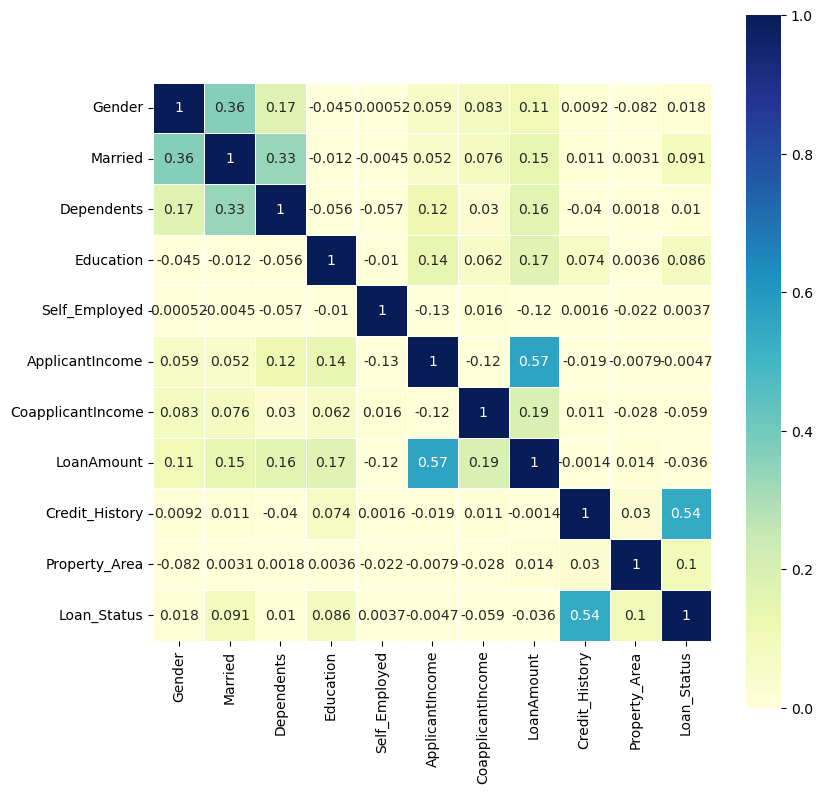

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), vmin=0, vmax=1, square=True, annot=True,cmap="YlGnBu",linewidths=.5)

In [32]:
X = df_train.drop(['Loan_Status'],axis=1)
y = df_train.Loan_Status

In [33]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,0
1,1,1.0,1,1,1.0,4583,1508.0,128,1.0,1
2,1,1.0,0,1,0.0,3000,0.0,66,1.0,0
3,1,1.0,0,0,1.0,2583,2358.0,120,1.0,0
4,1,0.0,0,1,1.0,6000,0.0,141,1.0,0
...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,0,1,1.0,2900,0.0,71,1.0,1
610,1,1.0,3,1,1.0,4106,0.0,40,1.0,1
611,1,1.0,1,1,1.0,8072,240.0,253,1.0,0
612,1,1.0,2,1,1.0,7583,0.0,187,1.0,0


In [34]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)

(491, 10)
(123, 10)


In [37]:
X_test[:1]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
454,1,0.0,0,1,0.0,7085,0.0,84,1.0,2


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [40]:
model_params = {
    'logistic_reg' : {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,5,10]
        }
    },
    
    'decision_tree': {
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"],
            'max_depth' : [1,5,10,15]
        }
    },
    
    'svm' : {
        'model' : SVC(),
        'params': {
            'C' : [1,5,10],
            'degree' : [3,5,10],
#             'kernel' : ['rbf','linear']
        }
    },
    
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,10,15,20]
        }
    },
    
    'random_forest' : {
        'model' : RandomForestClassifier(random_state=0),
        'params' : {
            'n_estimators' : [100,150,200],
            'criterion' : ["gini", "entropy"],
            'max_depth' : [1,5,10,15]
        }
    }
    
#     'naive_bayes' : {
#         'model' : GaussianNB()
#     }
}

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [42]:
scores = []
for model_name,mp in model_params.items():
    gscv = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'score' : gscv.best_score_,
        'best_params' : gscv.best_params_
    }) 


In [43]:
df_scores = pd.DataFrame(scores, columns=['model','score','best_params'])
df_scores

,model,score,best_params
0,logistic_reg,0.802391,{'C': 10}
1,decision_tree,0.804432,"{'criterion': 'gini', 'max_depth': 1, 'splitte..."
2,svm,0.676170,"{'C': 1, 'degree': 3}"
3,KNN,0.672088,{'n_neighbors': 15}
4,random_forest,0.804432,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


In [44]:
df_scores[:2]

,model,score,best_params
0,logistic_reg,0.802391,{'C': 10}
1,decision_tree,0.804432,"{'criterion': 'gini', 'max_depth': 1, 'splitte..."


In [45]:
scores

[{'model': 'logistic_reg',
  'score': 0.8023912595341166,
  'best_params': {'C': 10}},
 {'model': 'decision_tree',
  'score': 0.8044320758606472,
  'best_params': {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}},
 {'model': 'svm',
  'score': 0.6761698618841476,
  'best_params': {'C': 1, 'degree': 3}},
 {'model': 'KNN',
  'score': 0.6720882292310864,
  'best_params': {'n_neighbors': 15}},
 {'model': 'random_forest',
  'score': 0.8044320758606472,
  'best_params': {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}}]

In [46]:
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(C=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc

0.8373983739837398

In [47]:
#Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area

# data = ['Male','Yes',1,'Graduate','No',4583,1508.0,128.0,1.0,'Rural']
data = ['Male','Yes',0,'Graduate','Yes',3000,0.0,66.0,1.0,'Urban']
arr = np.array([data])
arr.shape

(1, 10)

In [48]:
ip = list(input("Enter loan approval details: ").strip().split())
ip

Enter loan approval details: Male Yes 0 Graduate Yes 3000 0 66 1 Urban


['Male', 'Yes', '0', 'Graduate', 'Yes', '3000', '0', '66', '1', 'Urban']

In [49]:
arr_ip = np.array([ip])

In [50]:
arr_ip.shape

(1, 10)

In [51]:
pred_df = pd.DataFrame(data=arr_ip,columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area'])
pred_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,0,Graduate,Yes,3000,0,66,1,Urban


In [52]:
pred_df.shape

(1, 10)

In [53]:
pred_df['Gender'] = pred_df['Gender'].map({'Male' : 1, 'Female' : 0})
pred_df['Married'] = pred_df['Married'].map({'Yes':1,'No':0})
pred_df['Dependents'] = pred_df['Dependents'].map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
pred_df['Education'] = pred_df['Education'].map({'Graduate':1, 'Not Graduate': 0}).astype(int)
pred_df['Self_Employed'] = pred_df['Self_Employed'].map({'Yes': 0, 'No': 1})
pred_df['Property_Area'] = pred_df['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)
pred_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,1,0,3000,0,66,1,0


In [54]:
op = classifier.predict(pred_df)
op

array([1])

In [55]:
if op == 1:
    print('Loan is Approved')
else:
    print('Loan is Not Approved')

Loan is Approved


In [56]:
import pickle

In [57]:
with open('loan_model.sav', 'wb') as f:
    pickle.dump(classifier,f)

In [58]:
with open('loan_model.sav', 'rb') as f:
    model = pickle.load(f)

In [59]:
model

LogisticRegression(C=10)

In [60]:
model.predict(pred_df)

array([1])